In [1]:
#Básico
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#PipeLine
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV


#ML
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, roc_auc_score

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Tratamento inicial

In [2]:
df_raw = pd.read_csv("dados/application_train.csv")

In [3]:
def filter_features(df: pd.DataFrame, threshold=0.5) -> pd.DataFrame:
    """ Filters the dataframe by the threshold of missing values

    Parameters
    ----------
    df : pd.DataFrame
        The dataframe to be filtered
    threshold : float
        The threshold to filter the dataframe

    Returns
    -------
    pd.DataFrame
        The filtered dataframe
    """
    df_copy = df.copy()
    df_copy = df_copy.isna().sum()/len(df_copy)
    df_copy = df_copy > threshold
    features_to_drop = df_copy[df_copy].index.to_list()
    return df.drop(columns=features_to_drop), features_to_drop

df_raw, features_dropadas = filter_features(df_raw, 0.5)

In [4]:
cat_features = [
    'NAME_CONTRACT_TYPE',
    'FLAG_OWN_CAR',
    'FLAG_OWN_REALTY',
    'NAME_TYPE_SUITE',
    'NAME_INCOME_TYPE',
    'NAME_EDUCATION_TYPE',
    'NAME_FAMILY_STATUS',
    'NAME_HOUSING_TYPE',
    'OCCUPATION_TYPE',
    'WEEKDAY_APPR_PROCESS_START',
    'ORGANIZATION_TYPE',
    'FONDKAPREMONT_MODE',
    'HOUSETYPE_MODE',
    'WALLSMATERIAL_MODE',
    'EMERGENCYSTATE_MODE',
    'FLAG_MOBIL',
    'FLAG_DOCUMENT_7',
    'FLAG_DOCUMENT_8',
    'FLAG_DOCUMENT_9',
    'FLAG_DOCUMENT_10',
    'FLAG_DOCUMENT_11',
    'FLAG_DOCUMENT_12',
    'FLAG_DOCUMENT_13',
    'FLAG_DOCUMENT_14',
    'FLAG_DOCUMENT_15',
    'FLAG_DOCUMENT_16',
    'FLAG_DOCUMENT_17',
    'FLAG_DOCUMENT_18',
    'FLAG_DOCUMENT_19',
    'FLAG_DOCUMENT_20',
    'FLAG_DOCUMENT_21',
    'FLAG_DOCUMENT_6',
    'FLAG_DOCUMENT_4',
    'FLAG_DOCUMENT_5',
    'REG_REGION_NOT_LIVE_REGION',
    'FLAG_DOCUMENT_2',
    'FLAG_EMP_PHONE',
    'LIVE_CITY_NOT_WORK_CITY',
    'REG_CITY_NOT_WORK_CITY',
    'REG_CITY_NOT_LIVE_CITY',
    'LIVE_REGION_NOT_WORK_REGION',
    'REG_REGION_NOT_WORK_REGION',
    'FLAG_DOCUMENT_3',
    'FLAG_EMAIL',
    'FLAG_PHONE',
    'FLAG_CONT_MOBILE',
    'FLAG_WORK_PHONE',
    'REGION_RATING_CLIENT_W_CITY',
    'REGION_RATING_CLIENT'
]


In [6]:
#Retirando da lista as features dropadas pelo filtro
for feature in features_dropadas:
    try:
        cat_features.remove(feature)
    except:
        pass

In [7]:
#Drop outlier
df_raw = df_raw.drop(159421, axis=0)
#Drop XNA
#df_raw = df_raw.drop("ORGANIZATION_TYPE", axis=1)
df_raw = df_raw.drop("CODE_GENDER", axis=1)

In [9]:
#Dividindo dataframe
X = df_raw.drop(["SK_ID_CURR", "TARGET"], axis=1)
y = df_raw["TARGET"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify= y)

#Undersampling
df_train = pd.concat([X_train, y_train], axis=1)
total_de_1 = df_train['TARGET'].value_counts()[1]
df_train_1 = df_train[df_train['TARGET'] == 1].copy()
df_train_0 = df_train[df_train['TARGET'] == 0].sample(n=total_de_1, replace=False)
df_bal_train = pd.concat([df_train_0, df_train_1], axis=0)
X_train = df_bal_train.drop(columns=['TARGET'], axis=1)
y_train = df_bal_train['TARGET']



In [10]:
df_bal_train['TARGET'].value_counts()

0    14977
1    14977
Name: TARGET, dtype: int64

### Modelagem

In [11]:
def cria_pipe_pre(features_num, features_cat):
    pipe_pre_num = Pipeline([
        ('pre_inp_num', SimpleImputer(strategy='median')),
        ('pre_sc_std', StandardScaler())
    ])

    pipe_pre_cat = Pipeline([
        ('pre_inp_cat_no', SimpleImputer(strategy='most_frequent')),
        ('pre_tra_one', OneHotEncoder(drop='first', handle_unknown='ignore'))
    ])

    pipe_pre = ColumnTransformer([
        ('pipe_pre_num', pipe_pre_num, features_num),
        ('pipe_pre_cat_no', pipe_pre_cat, features_cat)
    ])
    
    return pipe_pre

In [12]:
#lista de features
features_cat = cat_features
features_num = df_raw.drop(["SK_ID_CURR", "TARGET"]+cat_features, axis=1).columns.to_list()

In [13]:
pipe_pre = cria_pipe_pre(features_num, features_cat)
pipe_pre.fit(X_train)
#X_test_trans = pipe_pre.transform(X_test)

ColumnTransformer(transformers=[('pipe_pre_num',
                                 Pipeline(steps=[('pre_inp_num',
                                                  SimpleImputer(strategy='median')),
                                                 ('pre_sc_std',
                                                  StandardScaler())]),
                                 ['CNT_CHILDREN', 'AMT_INCOME_TOTAL',
                                  'AMT_CREDIT', 'AMT_ANNUITY',
                                  'AMT_GOODS_PRICE',
                                  'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
                                  'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
                                  'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS',
                                  'HOUR_APP...
                                  'ORGANIZATION_TYPE', 'EMERGENCYSTATE_MODE',
                                  'FLAG_MOBIL', 'FLAG_DOCUMENT_7',
                                  'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
                                  'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
                                  'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
                                  'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
                                  'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
                                  'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
                                  'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
                                  'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_4', ...])])

In [14]:
# from xgboost import XGBClassifier, XGBRegressor

# pipe_xgb= Pipeline([
#     ('pipe_pre', pipe_pre),
#     ('est_xgb', XGBRegressor(random_state=42, nthread=7,feature_selector = 'greedy'))
# ])

# pipe_xgb.fit(X_train, y_train)

# y_pred = pipe_xgb.predict(X_test)

In [15]:
from sklearn.linear_model import LogisticRegression

pipe_log= Pipeline([
    ('pipe_pre', pipe_pre),
    ('est_log', LogisticRegression(max_iter=1000, n_jobs=-2, penalty='l2'))
])

pipe_log.fit(X_train, y_train)

y_pred = pipe_log.predict(X_test)

C:\Users\Dougl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [18] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [16]:
roc_auc_score(y_test, y_pred)

0.6751333756732414

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.68      0.80     56510
           1       0.16      0.67      0.25      4992

    accuracy                           0.68     61502
   macro avg       0.56      0.68      0.53     61502
weighted avg       0.89      0.68      0.75     61502



In [18]:
cutoff = 0.4
y_pred_cutado = np.where(pipe_log.predict_proba(X_test)[:,1] >= cutoff, 1, 0)


C:\Users\Dougl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [18] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [19]:
y_pred_cutado

array([0, 0, 0, ..., 0, 0, 1])

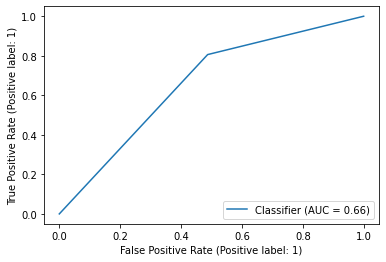

In [20]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, y_pred_cutado)

In [21]:
print(classification_report(y_test, y_pred_cutado))

              precision    recall  f1-score   support

           0       0.97      0.51      0.67     56510
           1       0.13      0.81      0.22      4992

    accuracy                           0.54     61502
   macro avg       0.55      0.66      0.45     61502
weighted avg       0.90      0.54      0.63     61502

